In [725]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')
pd.set_option("display.precision", 5)

In [726]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [727]:
ff = pd.read_excel('data/5factors.xlsx')
rt = pd.read_excel('data/north.xlsx' , skiprows=3)
esg = pd.read_excel('data/north31.xlsx', skiprows=3)
print(rt.shape)
print(esg.shape)
print(ff.shape)

(2352, 124)
(12, 739)
(8261, 7)


In [728]:
pd.set_option('display.max_columns',735) # I want to see all the columns
pd.set_option('display.max_rows',735) 

In [729]:
ff.rename(columns = {'Unnamed: 0' : 'date'}, inplace=True)
ff['date'] = pd.to_datetime(ff['date'], format='%Y%m%d')
filt = (ff['date'] >= pd.to_datetime('2013-04-03')) & (ff['date'] <= pd.to_datetime('2022-02-28'))
ff = ff[filt]
ff.reset_index(inplace = True, drop = True)

In [730]:
rt.drop(index=[0,1,2], inplace=True)
rt.reset_index(inplace = True, drop = True) # Drop old index too

In [731]:
it = rt.copy()
it.to_excel('it.xlsx')

In [732]:
rt.rename(columns={'Unnamed: 0':'date'},inplace = True) 
xx = ['1COV GY Equity','DTG GY Equity','SINCH SS Equity',
                 'SHL GY Equity','NEL NO Equity','DHER GY Equity',
                 'HFG GY Equity','LIN GY Equity','NETS DC Equity',
                 'DAX Index','OMXS30B Index','OMXC25 Index','OMX Index']
drop_these = []
for i in xx:
    for j in range(1,6):
        drop_these.append(i + '.' + str(j))
drop_these = xx + drop_these
rt.drop(columns=xx, inplace = True)

In [733]:
rt.columns = rt.columns.str.replace(' GY', ' G')
rt.columns = rt.columns.str.replace(' SS', ' S')
rt.columns = rt.columns.str.replace(' NO', ' N')
rt.columns = rt.columns.str.replace(' DC', ' D')
rt.columns = rt.columns.str.replace(' Equity', '')
rt.columns = rt.columns.str.replace(' ', '_')

In [734]:
rt['date'] = pd.to_datetime(rt['date'])
#rt.set_index('date',inplace = True) 

In [735]:
esg.drop(columns=drop_these,inplace = True) 
esg.drop(index=[0,2], inplace=True)
esg.rename(columns={'Unnamed: 0':'Date'},inplace = True) 
esg.reset_index(inplace = True, drop = True) 

In [736]:
esg.replace({'ESG_DISCLOSURE_SCORE': 'ESG', 'ENVIRON_DISCLOSURE_SCORE': 'E',
             'SOCIAL_DISCLOSURE_SCORE': 'S','GOVNCE_DISCLOSURE_SCORE': 'G',
             'HISTORICAL_MARKET_CAP' : 'HMCAP', 'CUR_MKT_CAP': 'MCAP'}, inplace=True)

In [737]:
asg = esg.iloc[1] + ' ' + esg.iloc[0]
esg = esg.append(asg, ignore_index=True)
esg.loc[10,'Date'] = 'date'
nnn = esg.loc[10]
esg.rename(columns=nnn, inplace=True)
esg.drop(index=[0,1,10], inplace=True)
esg.reset_index(inplace = True, drop = True)

/var/folders/w7/73hr8f356051gkf_bz1wvzw00000gn/T/ipykernel_3500/1060375272.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esg = esg.append(asg, ignore_index=True)


In [738]:
esg.columns = esg.columns.str.replace(' GY', ' G')
esg.columns = esg.columns.str.replace(' SS', ' S')
esg.columns = esg.columns.str.replace(' NO', ' N')
esg.columns = esg.columns.str.replace(' DC', ' D')
esg.columns = esg.columns.str.replace(' Equity', '')
esg.columns = esg.columns.str.replace(' ', '_')
esg.set_index('date', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [739]:
esg_esg = esg.loc[:,'ADS_G_ESG':'VWS_D_ESG']
esg_esg.columns = esg_esg.columns.str.replace('_ESG', '')

In [740]:
for i in rt.columns[1:]:
    rt.loc[:,i] = rt.loc[:,i].pct_change(1)*100
rt.drop(index=[0], inplace=True)

In [741]:
nyind = []
for i in esg_esg.index:
    nyind.append(str(i)+ '_esg')
esg_esg.index = nyind

In [742]:
rtt = pd.concat([rt, esg_esg])

In [743]:
#rtt.drop(columns='EVO_S', inplace=True)
#rt.drop(columns='EVO_S', inplace=True)
#no_ger = rtt.columns[1:35].tolist()
#rtt.drop(columns=no_ger, inplace=True)
#rt.drop(columns=no_ger, inplace=True)

In [744]:
filt = (rtt['date'] >= pd.to_datetime('2013-01-01')) & (rtt['date'] <= pd.to_datetime('2013-12-31')) 
thirteen = rtt[filt]
thirteen = pd.concat([thirteen, esg_esg])
thirteen = thirteen.replace(0, np.nan)
thirteen.dropna(how='all', axis='columns', thresh=150, inplace=True)
thirteen = thirteen.replace(np.nan, 0)
nah = ['2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg','2021_esg']
thirteen.drop(index=nah, inplace=True)
print(thirteen.shape)

(196, 103)


In [745]:
#  2013
q_l = thirteen.loc[thirteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = thirteen.loc[thirteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.67)
I = (thirteen.loc['2014_esg', 'ADS_G':'VWS_D'] <= q_l)
Ii = (thirteen.loc['2014_esg', 'ADS_G':'VWS_D'] > q_l) & (thirteen.loc['2014_esg', 'ADS_G':'VWS_D'] <= q_h)
Iii = (thirteen.loc['2014_esg', 'ADS_G':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
thirteen.sort_values(by = '2014_esg', axis = 1, na_position ='first', inplace=True)
thirteen_low = I[I==True].index.tolist()
thirteen_mid = Ii[Ii==True].index.tolist()
thirteen_high = Iii[Iii==True].index.tolist()

In [746]:
#2013
# low
thirteen = thirteen.iloc[:-1]
low_p=[]
for i in range(len(thirteen)):
     low_p.append(thirteen.iloc[i, 1:I_sum].mean())

# mid
mid_p=[]
for i in range(len(thirteen)):
     mid_p.append(thirteen.iloc[i, I_sum:Ii_sum].mean())

# high
high_p=[]
for i in range(len(thirteen)):
     high_p.append(thirteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [747]:
filt = (rtt['date'] >= pd.to_datetime('2014-01-01')) & (rtt['date'] <= pd.to_datetime('2014-12-31')) 
fourteen = rtt[filt]
fourteen = pd.concat([fourteen, esg_esg])
fourteen = fourteen.replace(0, np.nan)
fourteen.dropna(how='all', axis='columns', thresh=100, inplace=True)
fourteen = fourteen.replace(np.nan, 0)
nah = ['2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg','2021_esg']
fourteen.drop(index=nah, inplace=True)
fourteen.sort_values(by = '2014_esg', axis = 1, na_position ='first', inplace=True)

In [748]:
#2014
# low
fourteen = fourteen.iloc[:-1]
for i in range(len(fourteen)):
     low_p.append(fourteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(fourteen)):
     mid_p.append(fourteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(fourteen)):
     high_p.append(fourteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [749]:
#  2015
filt = (rtt['date'] >= pd.to_datetime('2015-01-01')) & (rtt['date'] <= pd.to_datetime('2015-12-31')) 
fifteen = rtt[filt]
fifteen = pd.concat([fifteen, esg_esg])
fifteen = fifteen.replace(0, np.nan)
fifteen.dropna(how='all', axis='columns', thresh=100, inplace=True)
fifteen = fifteen.replace(np.nan, 0)
nah = ['2014_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg','2021_esg']
fifteen.drop(index=nah, inplace=True)

q_l = fifteen.loc[fifteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = fifteen.loc[fifteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.67)
I = (fifteen.loc['2015_esg', 'ADS_G':'VWS_D'] <= q_l)
Ii = (fifteen.loc['2015_esg', 'ADS_G':'VWS_D'] > q_l) & (fifteen.loc['2015_esg', 'ADS_G':'VWS_D'] <= q_h)
Iii = (fifteen.loc['2015_esg', 'ADS_G':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
fifteen_low = I[I==True].index.tolist()
fifteen_mid = Ii[Ii==True].index.tolist()
fifteen_high = Iii[Iii==True].index.tolist()

In [750]:
fifteen.sort_values(by = '2015_esg', axis = 1, na_position ='first', inplace=True)

In [751]:
#2015
# low
fifteen = fifteen.iloc[:-1]
for i in range(len(fifteen)):
     low_p.append(fifteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(fifteen)):
     mid_p.append(fifteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(fifteen)):
     high_p.append(fifteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [752]:
#  2016
filt = (rtt['date'] >= pd.to_datetime('2016-01-01')) & (rtt['date'] <= pd.to_datetime('2016-12-31')) 
sixteen = rtt[filt]
sixteen = pd.concat([sixteen, esg_esg])
sixteen = sixteen.replace(0, np.nan)
sixteen.dropna(how='all', axis='columns', thresh=120, inplace=True)
sixteen = sixteen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2017_esg','2018_esg','2019_esg','2020_esg','2021_esg']
sixteen.drop(index=nah, inplace=True)

q_l = sixteen.loc[sixteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = sixteen.loc[sixteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.67)
I = (sixteen.loc['2016_esg', 'ADS_G':'VWS_D'] <= q_l)
Ii = (sixteen.loc['2016_esg', 'ADS_G':'VWS_D'] > q_l) & (sixteen.loc['2016_esg', 'ADS_G':'VWS_D'] <= q_h)
Iii = (sixteen.loc['2016_esg', 'ADS_G':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
sixteen_low = I[I==True].index.tolist()
sixteen_mid = Ii[Ii==True].index.tolist()
sixteen_high = Iii[Iii==True].index.tolist()

In [753]:
sixteen.sort_values(by = '2016_esg', axis = 1, na_position ='first', inplace=True)

In [754]:
#  2016
# low
sixteen = sixteen.iloc[:-1]
for i in range(len(sixteen)):
     low_p.append(sixteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(sixteen)):
     mid_p.append(sixteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(sixteen)):
     high_p.append(sixteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [755]:
#  2017
filt = (rtt['date'] >= pd.to_datetime('2017-01-01')) & (rtt['date'] <= pd.to_datetime('2017-12-31')) 
seventeen = rtt[filt]
seventeen = pd.concat([seventeen, esg_esg])
seventeen = seventeen.replace(0, np.nan)
seventeen.dropna(how='all', axis='columns', thresh=120, inplace=True)
seventeen = seventeen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2018_esg','2019_esg','2020_esg','2021_esg']
seventeen.drop(index=nah, inplace=True)

q_l = seventeen.loc[seventeen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = seventeen.loc[seventeen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.67)
I = (seventeen.loc['2017_esg', 'ADS_G':'VWS_D'] <= q_l)
Ii = (seventeen.loc['2017_esg', 'ADS_G':'VWS_D'] > q_l) & (seventeen.loc['2017_esg', 'ADS_G':'VWS_D'] <= q_h)
Iii = (seventeen.loc['2017_esg', 'ADS_G':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
seventeen_low = I[I==True].index.tolist()
seventeen_mid = Ii[Ii==True].index.tolist()
seventeen_high = Iii[Iii==True].index.tolist()

In [756]:
seventeen.sort_values(by = '2017_esg', axis = 1, na_position ='first', inplace=True)

In [757]:
#  2017
# low
seventeen = seventeen.iloc[:-1]
for i in range(len(seventeen)):
     low_p.append(seventeen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(seventeen)):
     mid_p.append(seventeen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(seventeen)):
     high_p.append(seventeen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [758]:
#  2018
filt = (rtt['date'] >= pd.to_datetime('2018-01-01')) & (rtt['date'] <= pd.to_datetime('2018-12-31')) 
eighteen  = rtt[filt]
eighteen = pd.concat([eighteen, esg_esg])
eighteen = eighteen.replace(0, np.nan)
eighteen.dropna(how='all', axis='columns', thresh=120, inplace=True)
eighteen = eighteen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2019_esg','2020_esg','2021_esg']
eighteen.drop(index=nah, inplace=True)

q_l = eighteen.loc[eighteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = eighteen.loc[eighteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.67)
I = (eighteen.loc['2018_esg', 'ADS_G':'VWS_D'] <= q_l)
Ii = (eighteen.loc['2018_esg', 'ADS_G':'VWS_D'] > q_l) & (eighteen.loc['2018_esg', 'ADS_G':'VWS_D'] <= q_h)
Iii = (eighteen.loc['2018_esg', 'ADS_G':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
eighteen_low = I[I==True].index.tolist()
eighteen_mid = Ii[Ii==True].index.tolist()
eighteen_high = Iii[Iii==True].index.tolist()

In [759]:
eighteen.sort_values(by = '2018_esg', axis = 1, na_position ='first', inplace=True)

In [760]:
#  2018
# low
eighteen = eighteen.iloc[:-1]
for i in range(len(eighteen)):
     low_p.append(eighteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(eighteen)):
     mid_p.append(eighteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(eighteen)):
     high_p.append(eighteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [761]:
#  2019
filt = (rtt['date'] >= pd.to_datetime('2019-01-01')) & (rtt['date'] <= pd.to_datetime('2019-12-31')) 
nineteen  = rtt[filt]
nineteen = pd.concat([nineteen, esg_esg])
nineteen = nineteen.replace(0, np.nan)
nineteen = nineteen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2020_esg','2021_esg']
nineteen.drop(index=nah, inplace=True)

q_l = nineteen.loc[nineteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = nineteen.loc[nineteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.67)
I = (nineteen.loc['2019_esg', 'ADS_G':'VWS_D'] <= q_l)
Ii = (nineteen.loc['2019_esg', 'ADS_G':'VWS_D'] > q_l) & (nineteen.loc['2019_esg', 'ADS_G':'VWS_D'] <= q_h)
Iii = (nineteen.loc['2019_esg', 'ADS_G':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
nineteen_low = I[I==True].index.tolist()
nineteen_mid = Ii[Ii==True].index.tolist()
nineteen_high = Iii[Iii==True].index.tolist()

In [762]:
nineteen.sort_values(by = '2019_esg', axis = 1, na_position ='first', inplace=True)

In [763]:
#  2019
# low
nineteen = nineteen.iloc[:-1]
for i in range(len(nineteen)):
     low_p.append(nineteen.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(nineteen)):
     mid_p.append(nineteen.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(nineteen)):
     high_p.append(nineteen.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [764]:
#  2020
filt = (rtt['date'] >= pd.to_datetime('2020-01-01')) & (rtt['date'] <= pd.to_datetime('2020-12-31')) 
twenty   = rtt[filt]
twenty = pd.concat([twenty, esg_esg])
twenty = twenty.replace(0, np.nan)
twenty = twenty.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2021_esg']
twenty.drop(index=nah, inplace=True)

q_l = twenty.loc[twenty.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = twenty.loc[twenty.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.67)
I = (twenty.loc['2020_esg', 'ADS_G':'VWS_D'] <= q_l)
Ii = (twenty.loc['2020_esg', 'ADS_G':'VWS_D'] > q_l) & (twenty.loc['2020_esg', 'ADS_G':'VWS_D'] <= q_h)
Iii = (twenty.loc['2020_esg', 'ADS_G':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
twenty_low = I[I==True].index.tolist()
twenty_mid = Ii[Ii==True].index.tolist()
twenty_high = Iii[Iii==True].index.tolist()

In [765]:
twenty.sort_values(by = '2020_esg', axis = 1, na_position ='first', inplace=True)

In [766]:
#  2020
# low
twenty = twenty.iloc[:-1]
for i in range(len(twenty)):
     low_p.append(twenty.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(twenty)):
     mid_p.append(twenty.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(twenty)):
     high_p.append(twenty.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [767]:
#  2021
filt = (rtt['date'] >= pd.to_datetime('2021-01-01')) & (rtt['date'] <= pd.to_datetime('2021-12-31')) 
twentyone = rtt[filt]
twentyone = pd.concat([twentyone, esg_esg])
twentyone = twentyone.replace(0, np.nan)
twentyone = twentyone.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg']
twentyone.drop(index=nah, inplace=True)

q_l = twentyone.loc[twentyone.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = twentyone.loc[twentyone.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.67)
I = (twentyone.loc['2021_esg', 'ADS_G':'VWS_D'] <= q_l)
Ii = (twentyone.loc['2021_esg', 'ADS_G':'VWS_D'] > q_l) & (twentyone.loc['2021_esg', 'ADS_G':'VWS_D'] <= q_h)
Iii = (twentyone.loc['2021_esg', 'ADS_G':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
twentyone_low = I[I==True].index.tolist()
twentyone_mid = Ii[Ii==True].index.tolist()
twentyone_high = Iii[Iii==True].index.tolist()

In [768]:
twentyone.sort_values(by = '2021_esg', axis = 1, na_position ='first', inplace=True)

In [769]:
#  2021
# low
twentyone = twentyone.iloc[:-1]
for i in range(len(twentyone)):
     low_p.append(twentyone.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(twentyone)):
     mid_p.append(twentyone.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(twentyone)):
     high_p.append(twentyone.iloc[i, Ii_sum:Iii_sum + 1].mean())

In [770]:
#  2022
filt = (rtt['date'] >= pd.to_datetime('2022-01-01')) & (rtt['date'] <= pd.to_datetime('2022-04-02')) 
twentytwo = rtt[filt]
twentytwo = pd.concat([twentytwo, esg_esg])
twentytwo = twentytwo.replace(0, np.nan)
twentytwo = twentytwo.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg']
twentytwo.drop(index=nah, inplace=True)

q_l = twentytwo.loc[twentytwo.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = twentytwo.loc[twentytwo.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.67)
I = (twentytwo.loc['2021_esg', 'ADS_G':'VWS_D'] <= q_l)
Ii = (twentytwo.loc['2021_esg', 'ADS_G':'VWS_D'] > q_l) & (twentytwo.loc['2021_esg', 'ADS_G':'VWS_D'] <= q_h)
Iii = (twentytwo.loc['2021_esg', 'ADS_G':'VWS_D'] > q_h)
I_sum = I.sum()
Ii_sum = Ii.sum() + I_sum
Iii_sum = Iii.sum() + Ii_sum
twentytwo_low = I[I==True].index.tolist()
twentytwo_mid = Ii[Ii==True].index.tolist()
twentytwo_high = Iii[Iii==True].index.tolist()

In [771]:
twentytwo.sort_values(by = '2021_esg', axis = 1, na_position ='first', inplace=True)

In [772]:
#  2022
# low
twentytwo = twentytwo.iloc[:-1]
for i in range(len(twentytwo)):
     low_p.append(twentytwo.iloc[i, 1:I_sum].mean())

# mid
for i in range(len(twentytwo)):
     mid_p.append(twentytwo.iloc[i, I_sum:Ii_sum].mean())

# high
for i in range(len(twentytwo)):
     high_p.append(twentytwo.iloc[i, Ii_sum:Iii_sum + 1].mean())

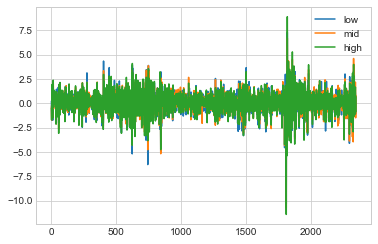

In [773]:
plt.plot(low_p, label = 'low')
plt.plot(mid_p, label = 'mid')
plt.plot(high_p, label = 'high')
plt.legend();

In [774]:
rt['port_low'] = low_p
rt['port_mid'] = mid_p
rt['port_high'] = high_p

In [775]:
rt.to_excel('rt.xlsx')
ff.to_excel('ff.xlsx')
esg_esg.to_excel('esg_esg.xlsx')

In [776]:
test = rt.copy()
test = test.replace(0, np.nan)
test.dropna(how='all', axis='index', thresh=4, inplace=True)
test = test.replace(np.nan, 0)
tab = test.describe()

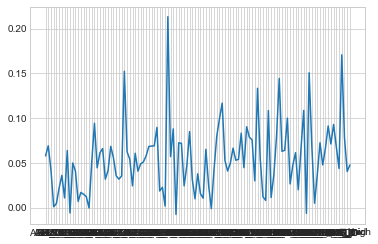

In [777]:
plt.plot(tab.loc['mean',:]);

In [778]:
high_r = tab.loc['mean',:].sort_values(ascending=False).tolist()
tab.loc['mean',:].sort_values(ascending=False).head()

EVO_S      0.21323
VWS_D      0.17069
SRT3_G     0.15236
GMAB_D     0.15066
AMBUB_D    0.14433
Name: mean, dtype: float64

In [779]:
esg_high_r = esg_esg.loc[:,['EVO_S','VWS_D','SRT3_G','GMAB_D','AMBUB_D','SALM_N','BAKKA_N','DSV_D','TOM_N','BAVA_D' ]].mean().tolist()

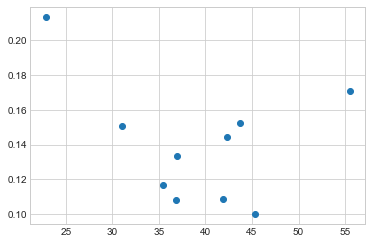

In [780]:
plt.scatter(esg_high_r,high_r[:10]);

In [781]:
high_l = tab.loc['mean',:].sort_values(ascending=True).tolist()
high_l=high_l[:10]
high_l

[-0.007577846288507962,
 -0.0064064096904672555,
 -0.005931230426752646,
 -0.0010747911778650062,
 -0.0003733766893817676,
 0.0010157417762705102,
 0.0017071686303182874,
 0.004610171886979687,
 0.004888015296645593,
 0.006963521387807491]

In [782]:
esg_high_l = esg_esg.loc[:,['HMB_S','FLS_D','DBK_G','TELIA_S','HEN3_G','BAS_G','ESSITYB_S','BAYN_G','ISS_D','EOAN_G' ]].mean().tolist()
esg_high_l

[43.33820000000001,
 45.759975000000004,
 45.59904999999999,
 47.585762499999994,
 51.610749999999996,
 62.9300375,
 60.69344999999999,
 67.94212499999999,
 49.638912499999996,
 60.41645]

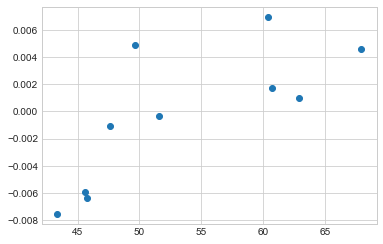

In [783]:
plt.scatter(esg_high_l,high_l);

In [784]:
esg

,ADS_G_ESG,AIR_G_ESG,ALV_G_ESG,BAS_G_ESG,BAYN_G_ESG,BMW_G_ESG,BNR_G_ESG,CON_G_ESG,DB1_G_ESG,DBK_G_ESG,DPW_G_ESG,DTE_G_ESG,EOAN_G_ESG,FME_G_ESG,FRE_G_ESG,HEI_G_ESG,HEN3_G_ESG,HNR1_G_ESG,IFX_G_ESG,MBG_G_ESG,MRK_G_ESG,MTX_G_ESG,MUV2_G_ESG,PAH3_G_ESG,PUM_G_ESG,QIA_G_ESG,RWE_G_ESG,SAP_G_ESG,SIE_G_ESG,SRT3_G_ESG,SY1_G_ESG,VNA_G_ESG,VOW3_G_ESG,ZAL_G_ESG,ABB_S_ESG,ALFA_S_ESG,ALIV_S_ESG,ASSAB_S_ESG,ATCOA_S_ESG,ATCOB_S_ESG,AZN_S_ESG,BOL_S_ESG,ELUXB_S_ESG,ERICB_S_ESG,ESSITYB_S_ESG,EVO_S_ESG,GETIB_S_ESG,HEXAB_S_ESG,HMB_S_ESG,INVEB_S_ESG,KINVB_S_ESG,NDA_S_ESG,SAND_S_ESG,SCAB_S_ESG,SEBA_S_ESG,SHBA_S_ESG,SKAB_S_ESG,SKFB_S_ESG,SWEDA_S_ESG,SWMA_S_ESG,TEL2B_S_ESG,TELIA_S_ESG,VOLVB_S_ESG,AKER_N_ESG,AKRBP_N_ESG,BAKKA_N_ESG,BWLPG_N_ESG,BWO_N_ESG,DNB_N_ESG,DNO_N_ESG,ENTRA_N_ESG,EQNR_N_ESG,FRO_N_ESG,GJF_N_ESG,LSG_N_ESG,MOWI_N_ESG,NHY_N_ESG,ORK_N_ESG,SALM_N_ESG,SCHA_N_ESG,SUBC_N_ESG,TEL_N_ESG,TOM_N_ESG,TGS_N_ESG,YAR_N_ESG,STB_N_ESG,AMBUB_D_ESG,MAERSKA_D_ESG,MAERSKB_D_ESG,BAVA_D_ESG,CARLB_D_ESG,CHR_D_ESG,COLOB_D_ESG,DANSKE_D_ESG,DEMANT_D_ESG,DSV_D_ESG,FLS_D_ESG,GMAB_D_ESG,GN_D_ESG,ISS_D_ESG,LUN_D_ESG,NOVOB_D_ESG,NZYMB_D_ESG,ORSTED_D_ESG,PNDORA_D_ESG,ROCKB_D_ESG,RBREW_D_ESG,SIM_D_ESG,TRYG_D_ESG,VWS_D_ESG,ADS_G_E,AIR_G_E,ALV_G_E,BAS_G_E,BAYN_G_E,BMW_G_E,BNR_G_E,CON_G_E,DB1_G_E,DBK_G_E,DPW_G_E,DTE_G_E,EOAN_G_E,FME_G_E,FRE_G_E,HEI_G_E,HEN3_G_E,HNR1_G_E,IFX_G_E,MBG_G_E,MRK_G_E,MTX_G_E,MUV2_G_E,PAH3_G_E,PUM_G_E,QIA_G_E,RWE_G_E,SAP_G_E,SIE_G_E,SRT3_G_E,SY1_G_E,VNA_G_E,VOW3_G_E,ZAL_G_E,ABB_S_E,ALFA_S_E,ALIV_S_E,ASSAB_S_E,ATCOA_S_E,ATCOB_S_E,AZN_S_E,BOL_S_E,ELUXB_S_E,ERICB_S_E,ESSITYB_S_E,EVO_S_E,GETIB_S_E,HEXAB_S_E,HMB_S_E,INVEB_S_E,KINVB_S_E,NDA_S_E,SAND_S_E,SCAB_S_E,SEBA_S_E,SHBA_S_E,SKAB_S_E,SKFB_S_E,SWEDA_S_E,SWMA_S_E,TEL2B_S_E,TELIA_S_E,VOLVB_S_E,AKER_N_E,AKRBP_N_E,BAKKA_N_E,BWLPG_N_E,BWO_N_E,DNB_N_E,DNO_N_E,ENTRA_N_E,EQNR_N_E,FRO_N_E,GJF_N_E,LSG_N_E,MOWI_N_E,NHY_N_E,ORK_N_E,SALM_N_E,SCHA_N_E,SUBC_N_E,TEL_N_E,TOM_N_E,TGS_N_E,YAR_N_E,STB_N_E,AMBUB_D_E,MAERSKA_D_E,MAERSKB_D_E,BAVA_D_E,CARLB_D_E,CHR_D_E,COLOB_D_E,DANSKE_D_E,DEMANT_D_E,DSV_D_E,FLS_D_E,GMAB_D_E,GN_D_E,ISS_D_E,LUN_D_E,NOVOB_D_E,NZYMB_D_E,ORSTED_D_E,PNDORA_D_E,ROCKB_D_E,RBREW_D_E,SIM_D_E,TRYG_D_E,VWS_D_E,ADS_G_S,AIR_G_S,ALV_G_S,BAS_G_S,BAYN_G_S,BMW_G_S,BNR_G_S,CON_G_S,DB1_G_S,DBK_G_S,DPW_G_S,DTE_G_S,EOAN_G_S,FME_G_S,FRE_G_S,HEI_G_S,HEN3_G_S,HNR1_G_S,IFX_G_S,MBG_G_S,MRK_G_S,MTX_G_S,MUV2_G_S,PAH3_G_S,PUM_G_S,QIA_G_S,RWE_G_S,SAP_G_S,SIE_G_S,SRT3_G_S,SY1_G_S,VNA_G_S,VOW3_G_S,ZAL_G_S,ABB_S_S,ALFA_S_S,ALIV_S_S,ASSAB_S_S,ATCOA_S_S,ATCOB_S_S,AZN_S_S,BOL_S_S,ELUXB_S_S,ERICB_S_S,ESSITYB_S_S,EVO_S_S,GETIB_S_S,HEXAB_S_S,HMB_S_S,INVEB_S_S,KINVB_S_S,NDA_S_S,SAND_S_S,SCAB_S_S,SEBA_S_S,SHBA_S_S,SKAB_S_S,SKFB_S_S,SWEDA_S_S,SWMA_S_S,TEL2B_S_S,TELIA_S_S,VOLVB_S_S,AKER_N_S,AKRBP_N_S,BAKKA_N_S,BWLPG_N_S,BWO_N_S,DNB_N_S,DNO_N_S,ENTRA_N_S,EQNR_N_S,FRO_N_S,GJF_N_S,LSG_N_S,MOWI_N_S,NHY_N_S,ORK_N_S,SALM_N_S,SCHA_N_S,SUBC_N_S,TEL_N_S,TOM_N_S,TGS_N_S,YAR_N_S,STB_N_S,AMBUB_D_S,MAERSKA_D_S,MAERSKB_D_S,BAVA_D_S,CARLB_D_S,CHR_D_S,COLOB_D_S,DANSKE_D_S,DEMANT_D_S,DSV_D_S,FLS_D_S,GMAB_D_S,GN_D_S,ISS_D_S,LUN_D_S,NOVOB_D_S,NZYMB_D_S,ORSTED_D_S,PNDORA_D_S,ROCKB_D_S,RBREW_D_S,SIM_D_S,TRYG_D_S,VWS_D_S,ADS_G_G,AIR_G_G,ALV_G_G,BAS_G_G,BAYN_G_G,BMW_G_G,BNR_G_G,CON_G_G,DB1_G_G,DBK_G_G,DPW_G_G,DTE_G_G,EOAN_G_G,FME_G_G,FRE_G_G,HEI_G_G,HEN3_G_G,HNR1_G_G,IFX_G_G,MBG_G_G,MRK_G_G,MTX_G_G,MUV2_G_G,PAH3_G_G,PUM_G_G,QIA_G_G,RWE_G_G,SAP_G_G,SIE_G_G,SRT3_G_G,SY1_G_G,VNA_G_G,VOW3_G_G,ZAL_G_G,ABB_S_G,ALFA_S_G,ALIV_S_G,ASSAB_S_G,ATCOA_S_G,ATCOB_S_G,AZN_S_G,BOL_S_G,ELUXB_S_G,ERICB_S_G,ESSITYB_S_G,EVO_S_G,GETIB_S_G,HEXAB_S_G,HMB_S_G,INVEB_S_G,KINVB_S_G,NDA_S_G,SAND_S_G,SCAB_S_G,SEBA_S_G,SHBA_S_G,SKAB_S_G,SKFB_S_G,SWEDA_S_G,SWMA_S_G,TEL2B_S_G,TELIA_S_G,VOLVB_S_G,AKER_N_G,AKRBP_N_G,BAKKA_N_G,BWLPG_N_G,BWO_N_G,DNB_N_G,DNO_N_G,ENTRA_N_G,EQNR_N_G,FRO_N_G,GJF_N_G,LSG_N_G,MOWI_N_G,NHY_N_G,ORK_N_G,SALM_N_G,SCHA_N_G,SUBC_N_G,TEL_N_G,TOM_N_G,TGS_N_G,YAR_N_G,STB_N_G,AMBUB_D_G,MAERSKA_D_G,MAERSKB_D_G,BAVA_D_G,CARLB_D_G,CHR_D_G,COLOB_D_G,DANSKE_D_G,DEMANT_D_G,DSV_D_

In [785]:
esg.loc[:,['DBK_G_ESG','DBK_G_E','DBK_G_S','DBK_G_G']]

,DBK_G_ESG,DBK_G_E,DBK_G_S,DBK_G_G
date,,,,
2014,35.9924,38.961,23.9117,45.0632
2015,42.2292,38.961,23.9117,63.7267
2016,42.5712,38.961,24.9395,63.7267
2017,48.8381,38.961,22.763,84.6478
2018,49.2808,40.2899,22.763,84.6478
2019,48.6269,40.2899,20.7981,84.6478
2020,48.6269,40.2899,20.7981,84.6478
2021,48.6269,40.2899,20.7981,84.6478


In [786]:
esg.loc[:,['DANSKE_D_ESG','DANSKE_D_E','DANSKE_D_S','DANSKE_D_G']]

,DANSKE_D_ESG,DANSKE_D_E,DANSKE_D_S,DANSKE_D_G
date,,,,
2014,42.4605,37.8436,21.705,67.7303
2015,40.6096,29.2057,21.705,70.8007
2016,40.4486,28.7224,21.705,70.8007
2017,42.6315,32.1051,24.8791,70.8007
2018,49.2506,26.2156,29.0206,92.354
2019,49.8642,33.7662,23.3071,92.354
2020,49.7234,33.3434,23.3071,92.354
2021,49.7234,33.3434,23.3071,92.354


In [787]:
tabl = pd.DataFrame(thirteen_low, columns=['2013_low'])
tabl['2013_mid'] = pd.DataFrame(thirteen_mid)
tabl['2013_high'] = pd.DataFrame(thirteen_high)
tabl['2014_low'] = pd.DataFrame(thirteen_low)
tabl['2014_mid'] = pd.DataFrame(thirteen_mid)
tabl['2014_high'] = pd.DataFrame(thirteen_high)
tabl['2015_low'] = pd.DataFrame(fifteen_low)
tabl['2015_mid']= pd.DataFrame(fifteen_mid)
tabl['2015_high'] = pd.DataFrame(fifteen_high)
tabl['2016_low']= pd.DataFrame(sixteen_low)
tabl['2016_mid'] = pd.DataFrame(sixteen_mid)
tabl['2016_high'] = pd.DataFrame(sixteen_high)
tabl['2017_low'] = pd.DataFrame(seventeen_low)
tabl['2017_mid'] = pd.DataFrame(seventeen_mid)
tabl['2017_high'] = pd.DataFrame(seventeen_high)
tabl['2018_low'] = pd.DataFrame(eighteen_low)
tabl['2018_mid'] = pd.DataFrame(eighteen_mid)
tabl['2018_high'] = pd.DataFrame(eighteen_high)
tabl['2019_low'] = pd.DataFrame(nineteen_low)
tabl['2019_mid'] = pd.DataFrame(nineteen_mid)
tabl['2019_high'] = pd.DataFrame(nineteen_high)
tabl['2020_low'] = pd.DataFrame(twenty_low)
tabl['2020_mid'] = pd.DataFrame(twenty_mid)
tabl['2020_high'] = pd.DataFrame(twenty_high)
tabl['2021_low'] = pd.DataFrame(twentyone_low)
tabl['2021_mid'] = pd.DataFrame(twentyone_mid)
tabl['2021_high'] = pd.DataFrame(twentyone_high)
tabl['2022_low']  = pd.DataFrame(twentytwo_low)
tabl['2022_mid'] = pd.DataFrame(twentytwo_mid)
tabl['2022_high'] = pd.DataFrame(twentytwo_high)

In [791]:
#print(tabl.to_latex(index = True, multirow = True))

In [792]:
tabl.to_excel('tabl.xlsx')